# Predicting stock rates

In [13]:
import pandas as pd
from datetime import datetime
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

## reading data into dataframe

In [14]:
df=pd.read_csv("sphist.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883


## Converting Date column to pandas date type

In [15]:
df["Date"]=pd.to_datetime(df["Date"])

In [16]:
#sorting df w.r.t Date column
df=df.sort_values("Date")

## Computing indicators

In [17]:
#Computing mean volume for past 5 days
df["vol_5"]=df["Volume"].rolling(5).mean()
#Computing mean volume for past 365 days
df["vol_365"]=df["Volume"].rolling(365).mean()
#column indicating the mean of past 5 stock price
df["day_5"]=df["Close"].rolling(5).mean()
#column indicating the mean of past 30 stock price
df["day_30"]=df["Close"].rolling(30).mean()
#column indicating the mean of past 365 stock price
df["day_365"]=df["Close"].rolling(365).mean()
#shifting by 1 down as rolling includes the current value
df[["vol_5","vol_365","day_5","day_30","day_365"]]=df[["vol_5","vol_365","day_5","day_30","day_365"]].shift(1)
#removing first 365 rows because they contain Nan
df=df[df["Date"] > datetime(year=1951, month=1, day=2)]
#dropping rows with na values
df=df.dropna(axis=0)
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,vol_5,vol_365,day_5,day_30,day_365
16224,1951-06-19,22.020000,22.020000,22.020000,22.020000,1100000.0,22.020000,1196000.0,1.989479e+06,21.800,21.703333,19.447726
16223,1951-06-20,21.910000,21.910000,21.910000,21.910000,1120000.0,21.910000,1176000.0,1.989041e+06,21.900,21.683000,19.462411
16222,1951-06-21,21.780001,21.780001,21.780001,21.780001,1100000.0,21.780001,1188000.0,1.986932e+06,21.972,21.659667,19.476274
16221,1951-06-22,21.549999,21.549999,21.549999,21.549999,1340000.0,21.549999,1148000.0,1.982959e+06,21.960,21.631000,19.489562
16220,1951-06-25,21.290001,21.290001,21.290001,21.290001,2440000.0,21.290001,1142000.0,1.981123e+06,21.862,21.599000,19.502082


## Train/Test Model

In [29]:
#generating train and test dataframes
train=df[df["Date"]< datetime(year=2013, month=1, day=1)]
test=df[df["Date"]> datetime(year=2013, month=1, day=1)]
cols=[["vol_5"],["vol_365"],["day_5"],["day_30"],["day_365"],["day_5","day_30"],["day_30","day_365"],["day_5","day_30","day_365"]]
#Predicting stock prices 
target=["Close"]
lr=LinearRegression()
mean_abs_err=[]
for columns in cols:
    lr.fit(train[columns],train[target])
    predictions=lr.predict(test[columns])
    mae=mean_absolute_error(predictions,test[target])
    mean_abs_err.append(mae)
print(mean_abs_err)

[734.57948803198371, 687.19696972619556, 16.267878754475266, 31.970513557097345, 146.631302068694, 16.149299962628589, 30.175302281842477, 16.142439643554408]


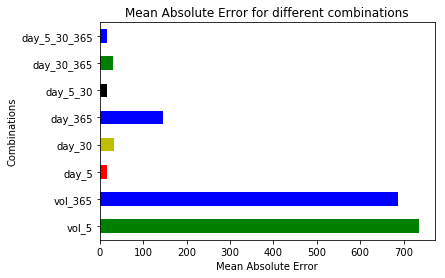

In [45]:
indexes=["vol_5","vol_365","day_5","day_30","day_365","day_5_30","day_30_365","day_5_30_365"]
ser = pd.Series(mean_abs_err,index=indexes)
ax=ser.plot(kind="barh",color="gbrybk")
ax.set_title("Mean Absolute Error for different combinations")
ax.set_xlabel("Mean Absolute Error")
ax.set_ylabel("Combinations")